# Statistical Tests
In this notebook we are going to study various statistical tests.

In [ ]:
import numpy as np
import scipy
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


1) __Kolmogorov-Smirnov test__: it tests the null hypothesis that two distributions are drawn from the same parent distribution.

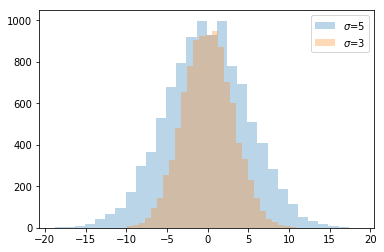

In [4]:
x1 = np.random.normal(0,3,10000)
x2 = np.random.normal(0,5,10000)

plt.hist(x2,bins=30,alpha=0.3,label='$\sigma$=5')
plt.hist(x1,bins=30,alpha=0.3,label='$\sigma$=3')
plt.legend()
plt.show()

In [14]:
print(scipy.stats.ks_2samp(x1,x2))

Ks_2sampResult(statistic=0.13070000000000004, pvalue=7.2016423822488979e-75)


If the probability (pvalue) $<$0.01 then the two distributions are significantly different.

In the following figure, we plot the Cumulative Distribution Functions of those distributions.

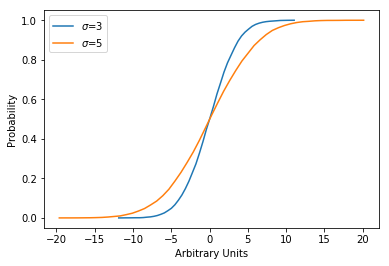

In [24]:
def plot_cdf(x_data,y_data):
    ecdf1 = sm.distributions.ECDF(x_data)
    x1 = np.linspace(min(x_data), max(x_data))
    x1 = np.array([x1[0]-(x1[1]-x1[0])]+list(x1))
    y1 = ecdf1(x1)
    
    ecdf2 = sm.distributions.ECDF(y_data)
    x2 = np.linspace(min(y_data), max(y_data))
    x2 = np.array([x2[0]-(x2[1]-x2[0])]+list(x2))
    y2 = ecdf2(x2)
  
    plt.plot(x1,y1,label='$\sigma$=3')
    plt.plot(x2,y2,label='$\sigma$=5')
    plt.xlabel('Arbitrary Units')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()
   

plot_cdf(x1,x2)

2) __Mann-Whitney test__ or __Wilcoxon rank test__: it tests the null hypothesis that two distributions are drawn from the same parent distribution (which is not normal necessarily). The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

"Unlike the t-test it does not require the assumption of normal distributions. It is nearly as efficient as the t-test on normal distributions."

The null hypothesis for the Wicoxon test is:  P(X>Y)=P(X<Y)

In [29]:
x = np.random.exponential(0.15,100000)
y = np.random.exponential(0.16,100000)

print scipy.stats.ks_2samp(x,y)
print scipy.stats.ranksums(x,y)

Ks_2sampResult(statistic=0.023459999999999925, pvalue=2.3600886669730656e-24)
RanksumsResult(statistic=-12.714428927623889, pvalue=4.9168842395563814e-37)


3) __Anderson–Darling test__: is a statistical test of whether a given sample of data is drawn from a given probability distribution (specialized for Gaussian distr.). In its basic form, the test assumes that there are no parameters to be estimated in the distribution being tested, in which case the test and its set of critical values is distribution-free.

In [43]:
import random

z = np.random.uniform(-3,3,100000)
k = np.random.normal(0,1,100000)
z.sort()
x = [random.choice(z) for i in range(1000)]
y = [random.choice(k) for i in range(100)]

zz = np.array([np.array(x),np.array(y)])

print scipy.stats.ks_2samp(x,y)
res = scipy.stats.anderson_ksamp(zz)
print 'Anderson-Darling Result, pvalue=',res[2]

Ks_2sampResult(statistic=0.247, pvalue=2.2374952433348328e-05)
Anderson-Darling Result, pvalue= 2.55118493595e-05


# When using what?
When working with a data set we may be faced __two questions__:  
- Is a set of samples consistent with following one of these distributions?  
- Are two sets of samples drawn from the same distribution?  


### Comparing a data set to a known (analytic) distribution
- $\chi^2$: Widely used, rigorously defined for known, Gaussian uncertainties.
- Kolmogorov-Smirnov (KS): Widely used, compares maximum difference in CDF. Not great for small numbers or outliers.
- Anderson-Darling: Integrated version of the KS test. Therefore better than KS for small numbers and outliers.
- t-test: Determines whether a data set could be consistent with having a mean at some value.

### Comparing two data sets
- Mann-Whitney U (Wilcoxon rank sum): Assumes nothing about underlying distributions. Really only compares the medians.
- Kolmogorov-Smirnov (KS): Widely used, compares maximum difference in CDF. Not great for small numbers of outliers.
- Anderson-Darling: Integrated version of the KS test. Therefore better than KS for small numbers and outliers.
- t-test: Tests if the means of two (assumed to be Gaussian) distributions equal. Distributions may have different variances - math is slightly different.
- F-test: Tests if the means of two Gaussian distributions are equal.

### Correlation tests
- Pearson r or $\rho$: Widely used, simple to implement. Easily skewed by outliers. Works for linear correlations.
- Spearman r or $\rho$: Handles outliers better. Linear not required -> works for any monotonic function.
- Kendall $\tau$: Also a rank test. Used to determine whether two variables are independent.